In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# Считываем файлы, дату как timestamp
df_train = pd.read_csv('NPF1_TRAIN.csv', encoding='windows-1251', delimiter=';', parse_dates=['period_dt'])
df_test = pd.read_csv('NPF1_TEST.csv', delimiter=';', parse_dates=['period_dt'])

In [3]:
df_train

,PRODUCT_ID,STORE_LOCATION_ID,period_dt,demand,PRODUCT_LVL_NM8,PRODUCT_LVL_NM13,PRODUCT_DESC,STORE_LOCATION_LVL_NM2,STORE_LOCATION_LVL_NM7,ST_LOC_DIVISION_NM,ST_LOC_MNGMT_CLSTR
0,135558,833805,2018-12-17,22.020,Фрукты,Бананы,Бананы 1кг,59 ПЕРМСКИЙ КРАЙ,22_1119160 ЛЫСЬВА Г,UR,D_UR17
1,135558,833805,2018-12-18,18.565,Фрукты,Бананы,Бананы 1кг,59 ПЕРМСКИЙ КРАЙ,22_1119160 ЛЫСЬВА Г,UR,D_UR17
2,135558,833805,2018-12-19,22.505,Фрукты,Бананы,Бананы 1кг,59 ПЕРМСКИЙ КРАЙ,22_1119160 ЛЫСЬВА Г,UR,D_UR17
3,135558,833805,2018-12-20,19.490,Фрукты,Бананы,Бананы 1кг,59 ПЕРМСКИЙ КРАЙ,22_1119160 ЛЫСЬВА Г,UR,D_UR17
4,135558,833805,2018-12-21,17.450,Фрукты,Бананы,Бананы 1кг,59 ПЕРМСКИЙ КРАЙ,22_1119160 ЛЫСЬВА Г,UR,D_UR17
...,...,...,...,...,...,...,...,...,...,...,...
3552066,1255736,1404250,2019-01-18,3.000,Сыры,Сыры плавленые,Сыр ДРУЖБА,42 КЕМЕРОВСКАЯ ОБЛ,22_1184635 НОВОКУЗНЕЦК Г,SB,D_SB05
3552067,1255736,1404250,2019-01-19,1.000,Сыры,Сыры плавленые,Сыр ДРУЖБА,42 КЕМЕРОВСКАЯ ОБЛ,22_1184635 НОВОКУЗНЕЦК Г,SB,D_SB05
3552068,1255736,1404511,2019-01-18,3.000,Сыры,Сыры плавленые,Сыр ДРУЖБА,76 ЯРОСЛАВСКАЯ ОБЛ,22_1090629 ПЕРЕСЛАВСКИЙ Р-Н,NV,D_NV20
3552069,1255736,1404511,2019-01-19,3.000,Сыры,Сыры плавленые,Сыр ДРУЖБА,76 ЯРОСЛАВСКАЯ ОБЛ,22_1090629 ПЕРЕСЛАВСКИЙ Р-Н,NV,D_NV20


In [4]:
df_train.columns

Index(['PRODUCT_ID', 'STORE_LOCATION_ID', 'period_dt', 'demand',
       'PRODUCT_LVL_NM8', 'PRODUCT_LVL_NM13', 'PRODUCT_DESC',
       'STORE_LOCATION_LVL_NM2', 'STORE_LOCATION_LVL_NM7',
       'ST_LOC_DIVISION_NM', 'ST_LOC_MNGMT_CLSTR'],
      dtype='object')

In [5]:
def df_clean_data(df, droping_cols=['PRODUCT_LVL_NM8', 'PRODUCT_LVL_NM13', 'PRODUCT_DESC']):
    df = df[df.PRODUCT_LVL_NM13 == 'Бананы']
    #Выкидываю слово бананы, фрукты, и PRODUCT_DESC = PRODUCT_ID, поэтому один из этих столбцов тоже выкидываю
    df = df.drop(columns=droping_cols)
    # Определяем день недели
    df['weekday'] = df_train.period_dt.apply(dt.weekday)
    return df

In [6]:
df_train = df_clean_data(df_train)
df_test = df_clean_data(df_test)

Смотрим на колонки. Ищем бесполезные

In [7]:
def unique(df):
    for column in df.columns:
        print('Column name', column, df[column].unique().shape[0])
        print(df[column].unique())
        print('******************************************************************************************\n')

In [8]:
df_test.shape[0]

9311

In [9]:
unique(df_train)

Column name PRODUCT_ID 3
[135558 360626 812805]
******************************************************************************************

Column name STORE_LOCATION_ID 13518
[ 833805  833807  833808 ... 1403895 1404250 1404511]
******************************************************************************************

Column name period_dt 35
['2018-12-17T00:00:00.000000000' '2018-12-18T00:00:00.000000000'
 '2018-12-19T00:00:00.000000000' '2018-12-20T00:00:00.000000000'
 '2018-12-21T00:00:00.000000000' '2018-12-22T00:00:00.000000000'
 '2018-12-23T00:00:00.000000000' '2018-12-24T00:00:00.000000000'
 '2018-12-25T00:00:00.000000000' '2018-12-26T00:00:00.000000000'
 '2018-12-27T00:00:00.000000000' '2018-12-28T00:00:00.000000000'
 '2018-12-29T00:00:00.000000000' '2018-12-30T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2019-01-02T00:00:00.000000000' '2019-01-03T00:00:00.000000000'
 '2019-01-04T00:00:00.000000000' '2019-01-05T00:00:00.000000000'
 '2

In [10]:
# Кажется что столбцы PRODUCT_DESC и PRODUCT_ID
#df_train.PRODUCT_ID.replace({135558 : 'Бананы 1кг', 360626 : 'Бананы фасованные.1кг', 
#                           812805 : 'Бананы-мини. 1кг'}) != df_train.PRODUCT_DESC).sum()

In [11]:
def plot_dt_demand(df):
#     mask = df.STORE_LOCATION_LVL_NM2 == '74 ЧЕЛЯБИНСКАЯ ОБЛ'
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x='period_dt', y='demand')
    
#     df = df.groupby('period_dt')
#     sns.lineplot(data=df_clean_holidays(df[mask]), x='period_dt', y='demand', hue='PRODUCT_ID')
#     dt_dem = df_train.groupby('period_dt').sum()['demand']
#     sns.lineplot(x=dt_dem.index, y=dt_dem.values)
    plt.show()

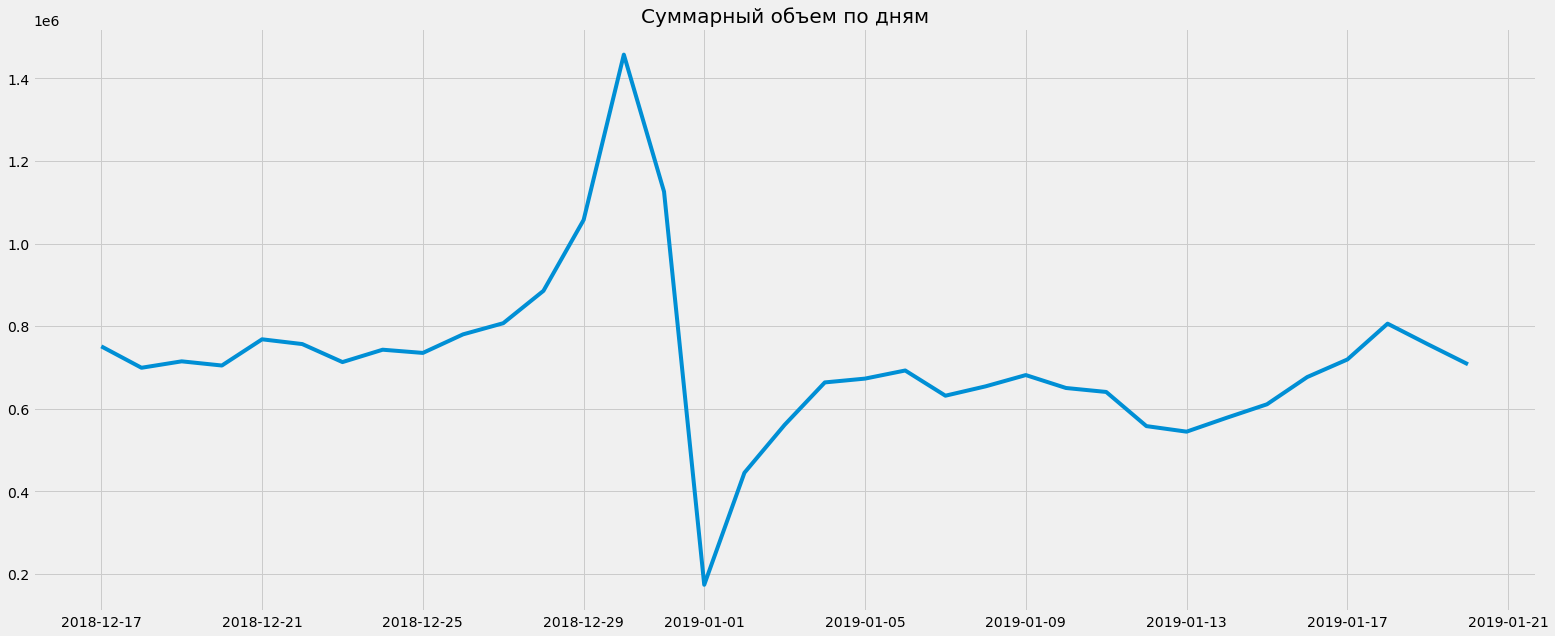

In [24]:
tmp = df_train.groupby('period_dt').sum()['demand']
plt.figure(figsize=(24, 10))
plt.title('Суммарный объем по дням', size=20)
plt.plot(tmp.index, tmp.values)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


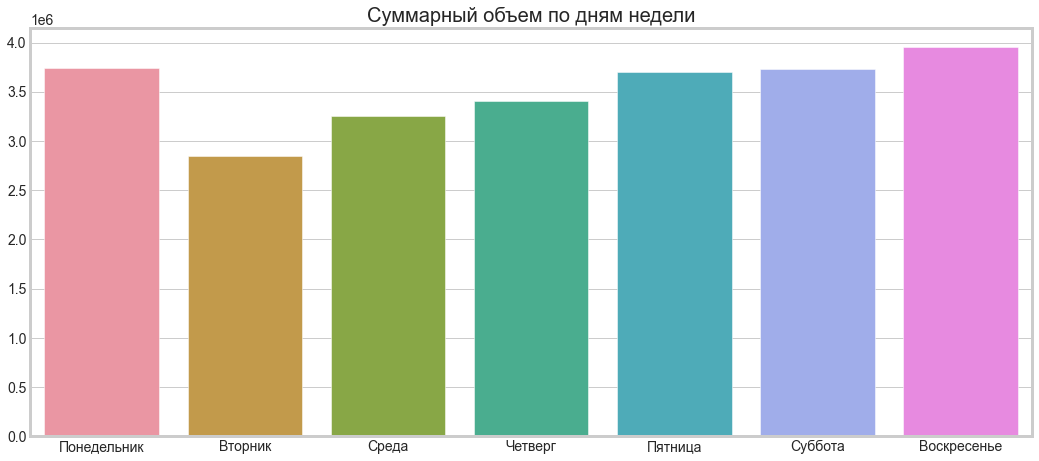

In [43]:
tmp = df_train.groupby('weekday').sum()['demand']
plt.figure(figsize=(16, 7))
plt.title('Суммарный объем по дням недели', size=20)
weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
sns.barplot(weekdays, tmp.values)
plt.show()

### График времени всей выборки с праздниками

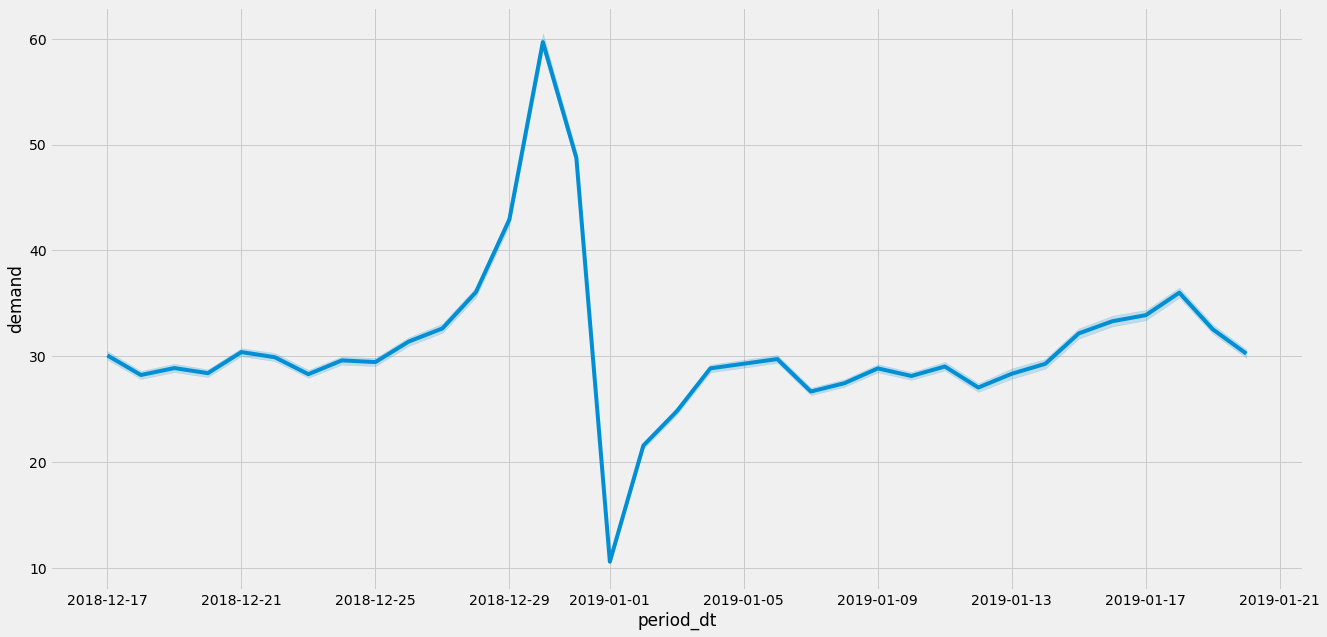

In [13]:
# plt.figure(figsize=)
plt.style.use('fivethirtyeight')
plot_dt_demand(df_train)

Удаляем с 27 по 4

In [36]:
def df_clean_holidays(df):
    mask_date = (df.period_dt < dt(year=2018, month=12, day=27)) | (df.period_dt > dt(year=2019, month=1, day=4))
    return df[mask_date]

In [37]:
np.sort(df_clean_holidays(df_train).period_dt.unique())

array(['2018-12-17T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-12-19T00:00:00.000000000', '2018-12-20T00:00:00.000000000',
       '2018-12-21T00:00:00.000000000', '2018-12-22T00:00:00.000000000',
       '2018-12-23T00:00:00.000000000', '2018-12-24T00:00:00.000000000',
       '2018-12-25T00:00:00.000000000', '2018-12-26T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [38]:
df_train = df_clean_holidays(df_train)

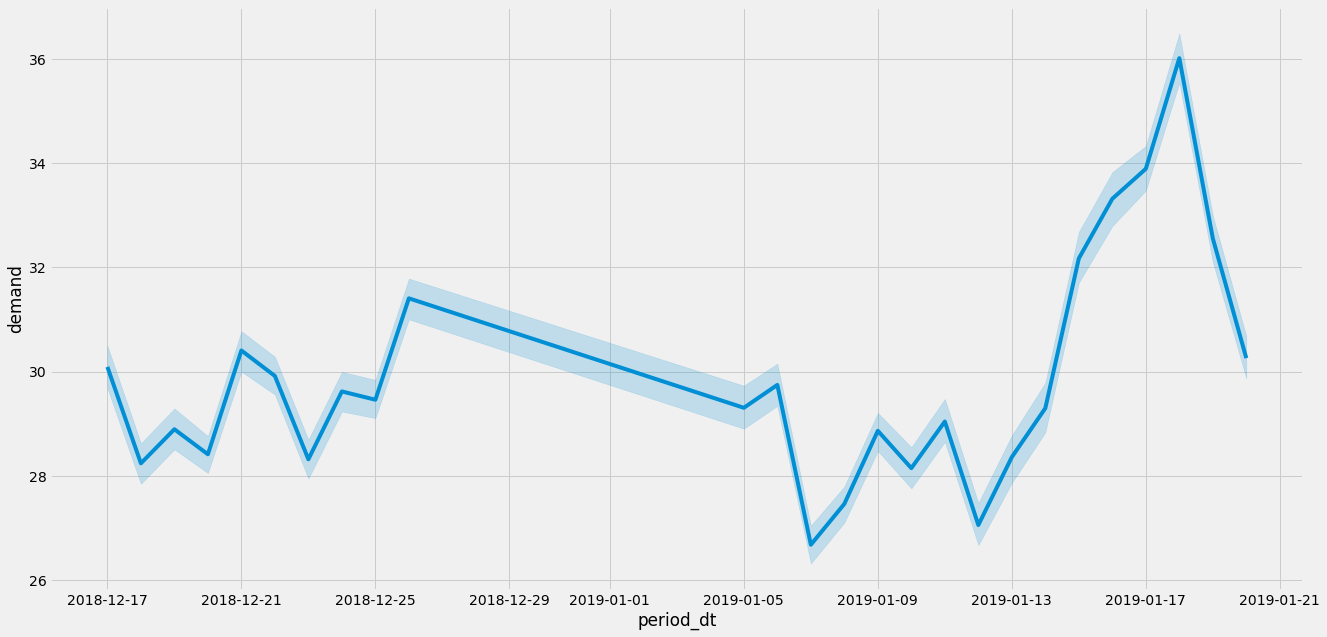

In [39]:
plot_dt_demand(df_train)

Глянем на гистограммы

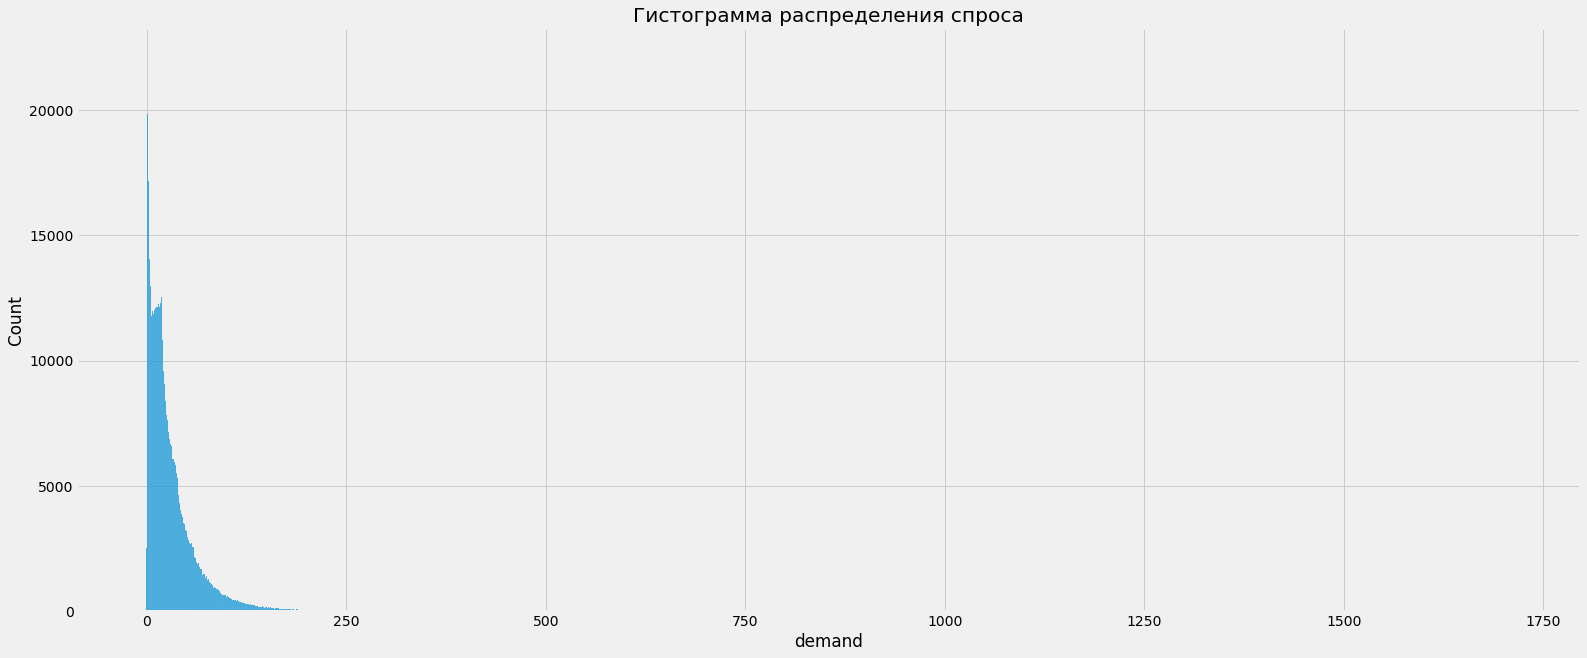

In [26]:
plt.figure(figsize=(24, 10))
plt.title('Гистограмма распределения спроса')
sns.histplot(df_train.demand)
plt.show()

Все что больше трехсот - бред

In [27]:
df_train = df_train[df_train.demand < 250]

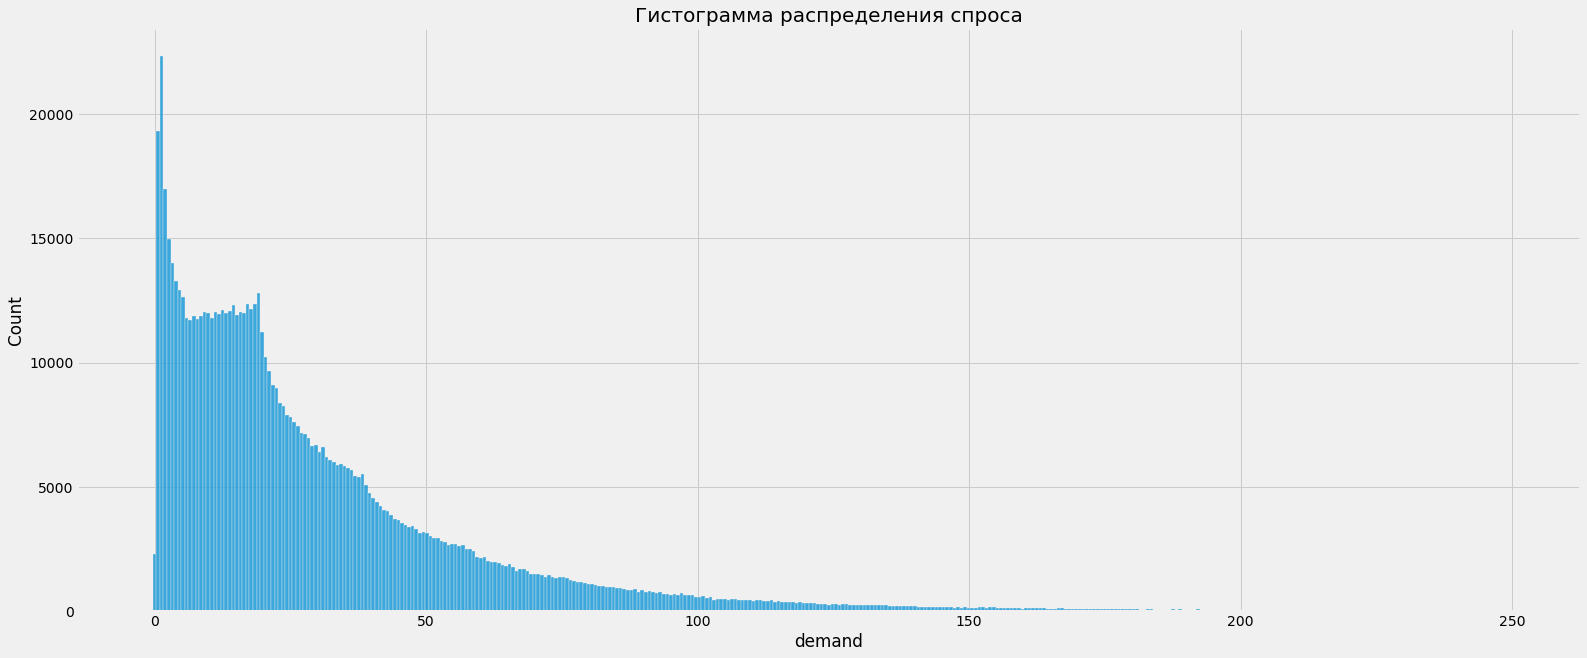

In [29]:
plt.figure(figsize=(24, 10))
plt.title('Гистограмма распределения спроса', size=20)
sns.histplot(df_train.demand)
plt.show()

In [34]:
reg_dem = df_train.groupby('STORE_LOCATION_LVL_NM2').sum()['demand']


In [35]:
reg_dem = reg_dem.sort_values()[::-1]

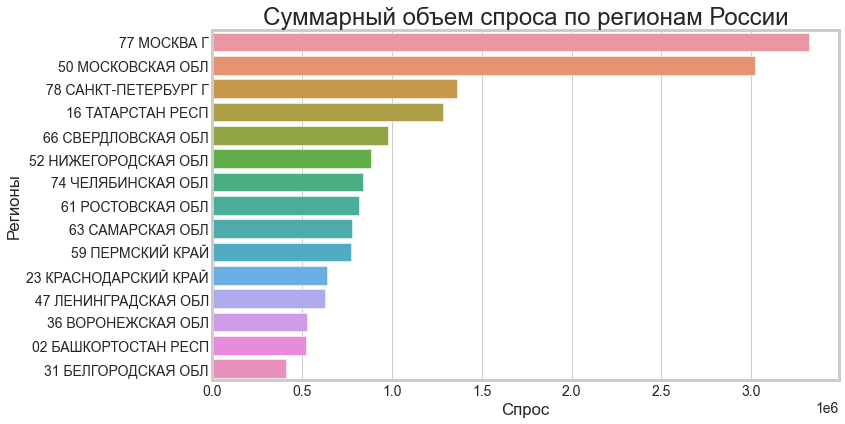

In [37]:
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.title('Суммарный объем спроса по регионам России', size=24)
sns.barplot(y = reg_dem.index[:15], x = reg_dem.values[:15])
plt.ylabel('Регионы')
plt.xlabel('Спрос')
plt.savefig('pic.png')
plt.show()

Сделаем три отдельных классификатора для Питера, мск и мск области

Думаю имеет смысл сделать классификатор, который определяют нулевой спрос и ненулевой спрос

In [20]:
def split_data(df):
    mask_mskobl = df.STORE_LOCATION_LVL_NM2 == '50 МОСКОВСКАЯ ОБЛ'
    mask_msk =  df.STORE_LOCATION_LVL_NM2 == '77 МОСКВА Г'
    mask_spb =  df.STORE_LOCATION_LVL_NM2 == '78 САНКТ-ПЕТЕРБУРГ Г'
    mask_all = ~(mask_mskobl | mask_msk | mask_spb)
    return [df[mask_msk], df[mask_mskobl], df[mask_spb], df[mask_all]]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [22]:
dfs_train = split_data(df_train)
dfs_test = split_data(df_test)

In [23]:
# dfs_test[0]

In [26]:
Xs_train = []
Xs_test = []
ys_train = []
for i in range(len(dfs_train)):
    tr = OneHotEncoder(handle_unknown='ignore')
    X_train_tr = tr.fit_transform(dfs_train[i][['STORE_LOCATION_ID', 'PRODUCT_ID']])
    X_test_tr = tr.transform(dfs_test[i][['STORE_LOCATION_ID', 'PRODUCT_ID']])
    Xs_train.append(X_train_tr)
    Xs_test.append(X_test_tr)
    ys_train.append(dfs_train[i].demand <= 10)

In [60]:
max_it = 100000

y_tests = []
y_cats = []
for i in range(len(dfs_test)):
    clf = LogisticRegression(max_iter=max_it)
    clf.fit(Xs_train[i], ys_train[i])
    y_pred = clf.predict_proba(Xs_test[i])[:, 1]
    y_tests.append(y_pred > 0.02)

In [61]:
from catboost import CatBoostRegressor

In [64]:
max_it = 100

y_cats = []
for i in range(len(dfs_test)):
    cat = CatBoostRegressor(iterations=max_it)
    cat.fit(Xs_train[i], dfs_train[i].demand)
    y_pred = cat.predict(Xs_test[i])
    y_cats.append(y_pred)

Learning rate set to 0.466723
0:	learn: 36.5402193	total: 9.09ms	remaining: 900ms
1:	learn: 34.2927435	total: 13.4ms	remaining: 658ms
2:	learn: 33.4997660	total: 19.9ms	remaining: 643ms
3:	learn: 33.0812234	total: 26.5ms	remaining: 637ms
4:	learn: 32.7684090	total: 32.7ms	remaining: 622ms
5:	learn: 32.5340598	total: 38.7ms	remaining: 606ms
6:	learn: 32.2567224	total: 45.1ms	remaining: 599ms
7:	learn: 32.0280984	total: 51.2ms	remaining: 589ms
8:	learn: 31.8384654	total: 57.4ms	remaining: 580ms
9:	learn: 31.6559298	total: 63.8ms	remaining: 574ms
10:	learn: 31.5207046	total: 69.8ms	remaining: 565ms
11:	learn: 31.3870912	total: 75.5ms	remaining: 554ms
12:	learn: 31.2675313	total: 81.1ms	remaining: 543ms
13:	learn: 31.1139293	total: 86.7ms	remaining: 533ms
14:	learn: 30.9831823	total: 92.4ms	remaining: 523ms
15:	learn: 30.9167420	total: 97.8ms	remaining: 514ms
16:	learn: 30.8234046	total: 103ms	remaining: 504ms
17:	learn: 30.7075917	total: 109ms	remaining: 497ms
18:	learn: 30.5801116	total:

69:	learn: 18.4448620	total: 507ms	remaining: 217ms
70:	learn: 18.4135433	total: 514ms	remaining: 210ms
71:	learn: 18.3804752	total: 522ms	remaining: 203ms
72:	learn: 18.3479436	total: 530ms	remaining: 196ms
73:	learn: 18.3128567	total: 537ms	remaining: 189ms
74:	learn: 18.2757838	total: 544ms	remaining: 181ms
75:	learn: 18.2403689	total: 550ms	remaining: 174ms
76:	learn: 18.2110714	total: 557ms	remaining: 166ms
77:	learn: 18.1852616	total: 563ms	remaining: 159ms
78:	learn: 18.1605182	total: 570ms	remaining: 151ms
79:	learn: 18.1355178	total: 576ms	remaining: 144ms
80:	learn: 18.1037582	total: 583ms	remaining: 137ms
81:	learn: 18.0762850	total: 589ms	remaining: 129ms
82:	learn: 18.0443997	total: 596ms	remaining: 122ms
83:	learn: 18.0128446	total: 602ms	remaining: 115ms
84:	learn: 17.9823074	total: 609ms	remaining: 107ms
85:	learn: 17.9579836	total: 616ms	remaining: 100ms
86:	learn: 17.9328745	total: 622ms	remaining: 93ms
87:	learn: 17.9099511	total: 629ms	remaining: 85.7ms
88:	learn: 1

29:	learn: 21.6819374	total: 1.14s	remaining: 2.66s
30:	learn: 21.6543067	total: 1.18s	remaining: 2.62s
31:	learn: 21.6273845	total: 1.22s	remaining: 2.58s
32:	learn: 21.6011791	total: 1.25s	remaining: 2.54s
33:	learn: 21.5738089	total: 1.29s	remaining: 2.51s
34:	learn: 21.5528717	total: 1.32s	remaining: 2.46s
35:	learn: 21.5318999	total: 1.36s	remaining: 2.42s
36:	learn: 21.5034662	total: 1.4s	remaining: 2.38s
37:	learn: 21.4831739	total: 1.43s	remaining: 2.34s
38:	learn: 21.4591454	total: 1.47s	remaining: 2.3s
39:	learn: 21.4319306	total: 1.5s	remaining: 2.26s
40:	learn: 21.4100248	total: 1.54s	remaining: 2.22s
41:	learn: 21.3843624	total: 1.58s	remaining: 2.19s
42:	learn: 21.3607562	total: 1.62s	remaining: 2.15s
43:	learn: 21.3408268	total: 1.66s	remaining: 2.12s
44:	learn: 21.3175671	total: 1.7s	remaining: 2.08s
45:	learn: 21.2996322	total: 1.73s	remaining: 2.03s
46:	learn: 21.2813608	total: 1.77s	remaining: 1.99s
47:	learn: 21.2585924	total: 1.81s	remaining: 1.96s
48:	learn: 21.23

In [67]:
for i in range(len(dfs_test)):
    df_test.loc[dfs_test[i].index, 'demand'] = pd.Series(index=dfs_test[i].index, data=1 - y_tests[i])

    ind = set((df_test[df_test.demand == 1]).index) & set(dfs_test[i].index)
    ind = np.array(list(ind))



    if (1 - y_tests[i]).sum():
        print((1 - y_tests[i]).sum())

        (np.arange(y_cats[i].shape[0]) + 1)
        inds = set((1 - y_tests[i]).astype('int') * (np.arange(y_cats[i].shape[0]) + 1)) - {0}
        inds -= {0}

        inds = np.array(list(inds))
        inds -= 1


        df_test.loc[ind, 'demand'] = pd.Series(index=ind, data=y_cats[i][inds])

107


In [68]:
sample_b = pd.read_csv('sample_b.csv', index_col='Id')
sample_b.loc[:, 'Predicted'] = df_test.demand
sample_b.to_csv('pzdc.csv')
sample_b.sum()

Predicted    7824.832797
dtype: float64